In [1]:
import numpy as np     
import pandas as pd

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import umap

In [5]:
import hdbscan

In [6]:
from sklearn.decomposition import PCA

# data

## Metadata

In [7]:
df_meta = pd.read_pickle('../../data/amphioxus_metadata_fina500.pickle')
df_meta

,path_to_video,filename_video,date,time,light,drugs,duration,age,stim_on,stim_off,stim_RGB,dlc_result_file
0,/media/athira/Amphioxus1/20180719/Exp_20180719...,20180719_114021_1_15m0s_None_None_None_INVERTE...,20180719,114021,None,none,900.0,59.0,NaN,NaN,None,../../data/dlc_results/20180719_114021_1_15m0s...
1,/media/athira/Amphioxus1/20180719/Exp_20180719...,20180719_115527_1_5m0s_None_None_None_INVERTED...,20180719,115527,None,none,300.0,59.0,NaN,NaN,None,../../data/dlc_results/20180719_115527_1_5m0s_...
2,/media/athira/Amphioxus1/20180719/Exp_20180719...,20180719_120032_1_5m0s_None_None_None_INVERTED...,20180719,120032,None,none,300.0,59.0,NaN,NaN,None,../../data/dlc_results/20180719_120032_1_5m0s_...
3,/media/athira/Amphioxus1/20180719/Exp_20180719...,20180719_120537_1_5m0s_None_None_None_INVERTED...,20180719,120537,None,none,300.0,59.0,NaN,NaN,None,../../data/dlc_results/20180719_120537_1_5m0s_...
4,/media/athira/Amphioxus1/20180719/Exp_20180719...,20180719_124445_1_15m0s_None_None_None_INVERTE...,20180719,124445,None,none,900.0,60.0,NaN,NaN,None,../../data/dlc_results/20180719_124445_1_15m0s...
...,...,...,...,...,...,...,...,...,...,...,...,...
526,/media/athira/Amphioxus1/20180727/Exp_20180727...,20180727_182500_1_5m0s_Dihydrokainic acid_None...,20180727,182500,None,Dihydrokainic acid,300.0,89.0,NaN,NaN,None,../../data/dlc_results/20180727_182500_1_5m0s_...
527,/media/athira/Amphioxus1/20180727/Exp_20180727...,20180727_183214_1_15m0s_Dihydrokainic acid_Non...,20180727,183214,None,Dihydrokainic acid,900.0,90.0,NaN,NaN,None,../../data/dlc_results/20180727_183214_1_15m0s...
528,/media/athira/Amphioxus1/20180727/Exp_20180727...,20180727_184720_1_5m0s_Dihydrokainic acid_None...,20180727,184720,None,Dihydrokainic acid,300.0,90.0,NaN,NaN,None,../../data/dlc_results/20180727_184720_1_5m0s_...
529,/media/athira/Amphioxus1/20180727/Exp_20180727...,20180727_185225_1_5m0s_Dihydrokainic acid_None...,20180727,185225,None,Dihydrokainic acid,300.0,90.0,NaN,NaN,None,../../data/dlc_results/20180727_185225_1_5m0s_...


In [8]:
df_meta['filename'] = df_meta['filename_video'].apply(lambda x: x.split('.avi')[0])
df_meta['filename'][0]

'20180719_114021_1_15m0s_None_None_None_INVERTED'

## Data : Features 

In [9]:
# Select wildtype only

df_all = pd.read_hdf('../../results/pickled_featureset_v3.h5', key='features')
df_all['drug'] = df_all['filename'].apply(lambda x: x.split('_')[4])
df_all['light'] = df_all['filename'].apply(lambda x: x.split('_')[6])
df = df_all[(df_all['drug']=='None')&(df_all['light']=='None')]
# df = df[(df['speed_MOUTH'] < 20)|df['speed_MOUTH'] ==np.nan]

In [10]:
len(df.index)

2280169

In [11]:
df = df[(df['speed_MOUTH'].isna())|(df['speed_MOUTH'] < 20)]

In [12]:
len(df.index)

2267077

In [13]:
cols_curv = list(df.filter(like='curv').columns)
df[cols_curv] = Normalizer().fit_transform(df[cols_curv])

# df[cols_curv] = df[cols_curv].abs()
for col in cols_curv[:5]:
    print(df[col].min(), df[col].max())

-0.9004415238007496 0.9186015317161667
-0.8544243150644738 0.7974928479194784
-0.7158563180957648 0.8304835051920123
-0.7255866578686605 0.9342445545263371
-0.9925389106290867 0.9889798748521608


In [14]:
cols_speed = list(df.filter(like='speed').columns)
df[cols_speed] = MinMaxScaler().fit_transform(df[cols_speed])


In [15]:
df['len_sum_of_parts'] = pd.DataFrame(MinMaxScaler().fit_transform(df['len_sum_of_parts'].values.reshape(-1,1)), index=df.index)

In [16]:
df['quirkiness'] = #

In [17]:
df = df.fillna(value=-0.1)

In [18]:
df['speed_dorsal_avg'] = df.filter(like='speed_D').mean(axis = 1)

In [19]:
df['speed_ventral_avg'] = df.filter(like='speed_V').mean(axis = 1)

In [20]:
df['curv_avg'] = df.filter(like='curv').abs().mean(axis = 1)

In [21]:
df['filename'][0]

'20180719_114021_1_15m0s_None_None_None_INVERTED'

In [22]:
df_meta[['filename', 'age']]

,filename,age
0,20180719_114021_1_15m0s_None_None_None_INVERTED,59.0
1,20180719_115527_1_5m0s_None_None_None_INVERTED,59.0
2,20180719_120032_1_5m0s_None_None_None_INVERTED,59.0
3,20180719_120537_1_5m0s_None_None_None_INVERTED,59.0
4,20180719_124445_1_15m0s_None_None_None_INVERTED,60.0
...,...,...
526,20180727_182500_1_5m0s_Dihydrokainic acid_None...,89.0
527,20180727_183214_1_15m0s_Dihydrokainic acid_Non...,90.0
528,20180727_184720_1_5m0s_Dihydrokainic acid_None...,90.0
529,20180727_185225_1_5m0s_Dihydrokainic acid_None...,90.0


In [23]:
df

,len_NT_to_TT,len_sum_of_parts,len_mean_of_parts,curv_NT,curv_DH1,curv_DH2,curv_DNP,curv_DTP1,curv_DTP2,curv_DTP3,...,speed_VNP,speed_MOUTH,MOUTH,filename,frame,drug,light,speed_dorsal_avg,speed_ventral_avg,curv_avg
0,58.556391,0.351529,8.132465,0.028287,0.088551,0.061626,0.050408,0.022898,0.067654,-0.087110,...,-0.100000,-0.100000,0.0,20180719_114021_1_15m0s_None_None_None_INVERTED,0,None,None,0.013035,-0.100000,0.179426
1,54.780271,0.301248,7.470747,-0.149916,-0.079946,-0.153422,-0.356525,-0.546871,-0.176949,-0.161163,...,-0.100000,-0.100000,0.0,20180719_114021_1_15m0s_None_None_None_INVERTED,1,None,None,0.013035,-0.100000,0.222621
2,60.175949,0.383769,8.556749,-0.041500,-0.038981,-0.041792,-0.082320,-0.123546,-0.499847,-0.321610,...,-0.100000,-0.100000,0.0,20180719_114021_1_15m0s_None_None_None_INVERTED,2,None,None,0.015548,-0.100000,0.184288
3,53.550173,0.298695,7.437147,-0.130328,-0.119381,-0.140248,-0.241897,-0.326119,-0.323070,-0.226535,...,-0.100000,-0.100000,0.0,20180719_114021_1_15m0s_None_None_None_INVERTED,3,None,None,0.017319,-0.100000,0.220380
4,53.429537,0.300922,7.466454,-0.149150,-0.099929,-0.121753,-0.213763,-0.302371,-0.300413,-0.332353,...,-0.100000,-0.100000,0.0,20180719_114021_1_15m0s_None_None_None_INVERTED,4,None,None,0.006216,-0.100000,0.219026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052249,87.837633,0.642143,11.957001,0.256106,0.456839,0.364036,0.430307,0.237718,-0.044251,-0.259086,...,0.029942,0.065459,1.0,20180725_171817_1_15m0s_None_None_None_INVERTED,26239,None,None,0.007607,0.025034,0.230073
6052250,87.721733,0.640234,11.931880,0.156879,0.343740,0.348766,0.362482,0.351533,0.010644,-0.389746,...,0.015718,0.053110,1.0,20180725_171817_1_15m0s_None_None_None_INVERTED,26240,None,None,0.010204,0.046364,0.229222
6052251,88.373310,0.644069,11.982355,-0.089828,0.212769,0.288294,0.315857,0.410567,0.104599,-0.090662,...,0.033333,0.064949,1.0,20180725_171817_1_15m0s_None_None_None_INVERTED,26241,None,None,0.006074,0.019052,0.226795
6052252,88.686965,0.652429,12.092367,0.021948,0.273642,0.194481,0.182524,0.310079,-0.086415,-0.132095,...,0.014008,0.088252,1.0,20180725_171817_1_15m0s_None_None_None_INVERTED,26242,None,None,0.011334,0.023496,0.229883


In [24]:
df_merged = df.merge(df_meta, how='left', on='filename')

In [25]:
df = df_merged[(df_merged['age'] > 50)&(df_merged['drugs']=='none')]

In [26]:
len(df.filename.unique())

219

In [27]:
len(df.index)

1940535

In [28]:
# pca1 = PCA(n_components=6)
# pca_curv = pca1.fit_transform(df.filter(like='curv_'))

In [29]:
# pca2 = PCA(n_components=6)
# pca_spD = pca2.fit_transform(df.filter(like='speed_D'))

In [30]:
# for i in range(6):
#         df[f'pca_curv{i+1}'] = pca_curv[:,i]
#         df[f'pca_spD{i+1}'] = pca_spD[:,i]

In [31]:
df_in = df.filter(items = [
                           'speed_NT', 'speed_DH1', 'speed_DH2', 'speed_DNP', 'speed_DTP1',
       'speed_DTP2', 'speed_DTP3', 'speed_DTP4', 'speed_DTP5', 'speed_DTP6',
       'speed_DTP7', 'speed_DTP8', 'speed_DTP9', 'speed_DTP10', 'speed_TT',
       'speed_VTP10', 'speed_VTP9', 'speed_VTP8', 'speed_VTP7', 'speed_VTP6',
       'speed_VTP5', 'speed_VTP4', 'speed_VTP3', 'speed_VTP2', 'speed_VTP1',
       'speed_VNP', 'speed_MOUTH', 'curv_avg', 'quirkiness'        
                          ])

# UMAP

In [32]:
weights_curv = np.power(2, df_in.filter(like='speed_D').sum(axis=1))

In [33]:
weights_curv = -1 * np.log(df_in['quirkiness'])

/share/python-virtual-environments/vame0_1/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


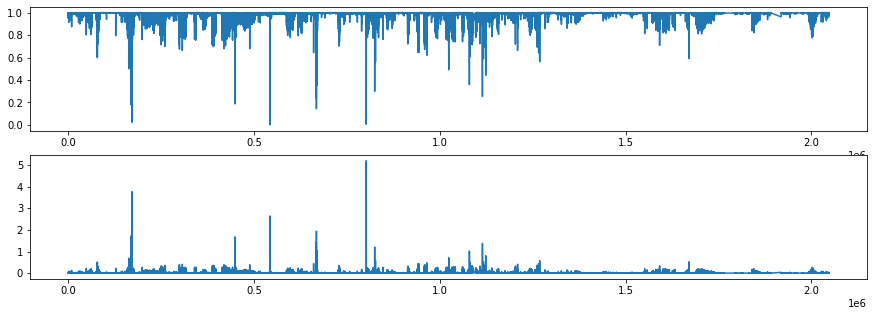

In [34]:
fig, axes = plt.subplots(2,1,figsize=(15,5))
axes[0].plot(df_in['quirkiness'])
axes[1].plot(weights_curv)

In [35]:
# fig, axes = plt.subplots(2,1,figsize=(15,5))
# axes[0].plot(df_in.filter(like='speed_d').sum(axis=1))
# axes[1].plot(weights_curv)

In [36]:
df_sampled = df_in#.sample(frac=0.5)
df_sampled.shape

(1940535, 29)

In [37]:
reducer = umap.UMAP()

In [38]:
embedding = reducer.fit_transform(df_sampled.values)
embedding.shape

(1940535, 2)

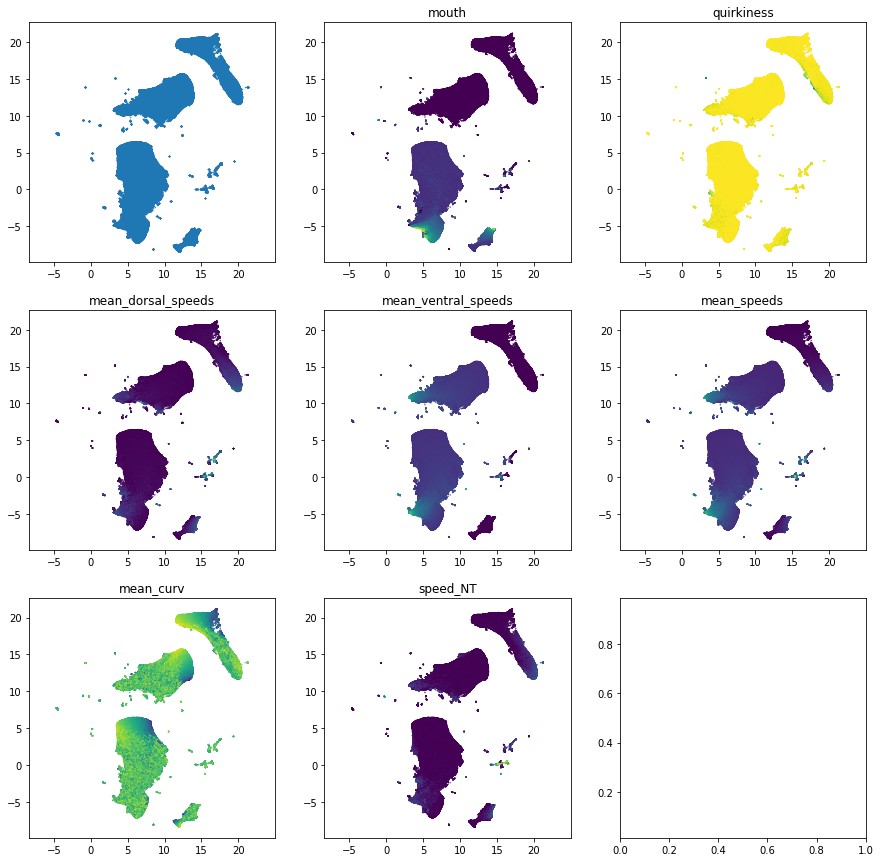

In [39]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes= axes.ravel()
axes[0].scatter(embedding[:, 0],embedding[:, 1], s=0.2)

hue_feats = {'mouth': df_sampled['speed_MOUTH'],
             'quirkiness': df_sampled['quirkiness'],
             'mean_dorsal_speeds': df_sampled.filter(like='speed_D').mean(axis=1),
             'mean_ventral_speeds': df_sampled.filter(like='speed_V').mean(axis=1),
             'mean_speeds': df_sampled.filter(like='speed_').mean(axis=1),
#              'length': df_sampled['len_sum_of_parts'],
             'mean_curv': df_sampled.filter(like='curv').abs().mean(axis=1),
             'speed_NT': df_sampled['speed_NT'],
            }

for i, key_hue in enumerate(hue_feats.keys()):
    axes[i+1].scatter(embedding[:, 0],embedding[:, 1], c= hue_feats[key_hue], s=0.2)
    axes[i+1].set_title(key_hue)
for ax in axes:  
    ax.set_aspect('equal', 'datalim')

# HDBSCAN

In [89]:
clusterer = hdbscan.HDBSCAN(
    min_samples= 1, #larger values implies more points considered as noise
    min_cluster_size= 1000, #smallest size grouping to be considered as a cluster
    prediction_data=True, 
)

In [90]:
embedding.shape, df_sampled['quirkiness'].shape

((1940535, 2), (1940535,))

In [91]:
clusterer_in = np.hstack([embedding, df_sampled['speed_NT'].values.reshape(-1,1), df_sampled['speed_MOUTH'].values.reshape(-1,1)])
clusterer_in.shape

(1940535, 4)

In [92]:
labels = clusterer.fit_predict(clusterer_in)

In [93]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [94]:
dict_clusters = {f'cluster_{i}':np.sum(labels==i) for i in list(np.unique(labels))}
dict_clusters

{'cluster_-1': 4249,
 'cluster_0': 39800,
 'cluster_1': 1345,
 'cluster_2': 1168,
 'cluster_3': 2016,
 'cluster_4': 583065,
 'cluster_5': 1152,
 'cluster_6': 1052,
 'cluster_7': 275761,
 'cluster_8': 1675,
 'cluster_9': 1029252}

In [95]:
c_pal = sns.color_palette('tab20', 20)
c_dict = {i: c_pal[i+1] for i in np.unique(labels)}
labels_c = [c_dict[lab] for lab in labels]

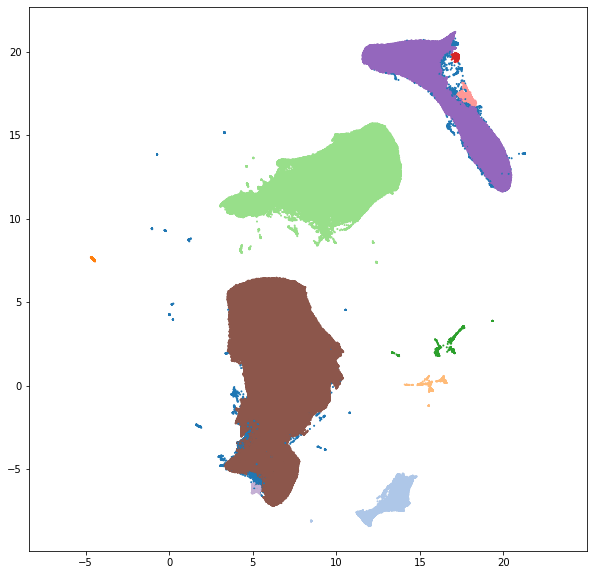

In [96]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.scatter(
    embedding[:, 0],
    embedding[:, 1], c=labels_c, s=1, cmap='tab10')

axes.set_aspect('equal', 'datalim')

<AxesSubplot:ylabel='$\\lambda$ value'>

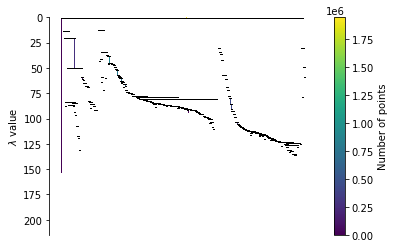

In [98]:
clusterer.condensed_tree_.plot()

# Does the frames match?

In [100]:
# list(df.filename.unique())

In [101]:
test_file_id = '20180724_180559_1_15m0s_None_None_None_INVERTED'

In [102]:
len(df.index), len(df_in.index)

(1940535, 1940535)

In [103]:
df_test1 = df_in[df['filename'] == test_file_id]

In [104]:
umap_test1 = reducer.transform(df_test1.values)

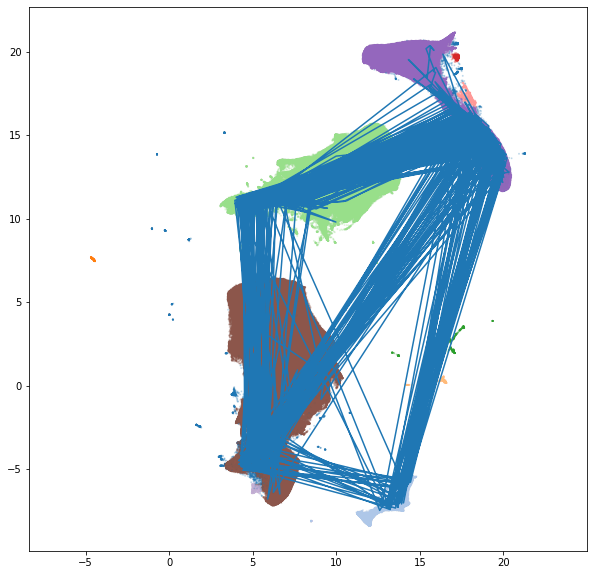

In [113]:
fig, axes = plt.subplots(1,1,figsize=(10,10))
axes.scatter(
    embedding[:, 0],
    embedding[:, 1], c=labels_c, s=1, cmap='tab10', alpha=0.2)
axes.plot(umap_test1[:2000,0], umap_test1[:2000,1])
axes.set_aspect('equal', 'datalim')

In [106]:
umap_test1.shape

(24926, 2)

In [107]:
cluster_in_test = np.hstack([umap_test1, df_test1['speed_NT'].values.reshape(-1,1), df_test1['speed_MOUTH'].values.reshape(-1,1)])

In [108]:
test_lables, strengths = hdbscan.approximate_predict(clusterer,cluster_in_test)

In [109]:
np.unique(test_lables)

array([-1,  0,  2,  3,  4,  6,  7,  9], dtype=int32)

In [110]:
c_outliers = sns.color_palette('Set3', 7)

In [111]:
test_labels_c = [c_dict[lab] if (lab in labels) else c_outliers[lab+1] for lab in test_lables]

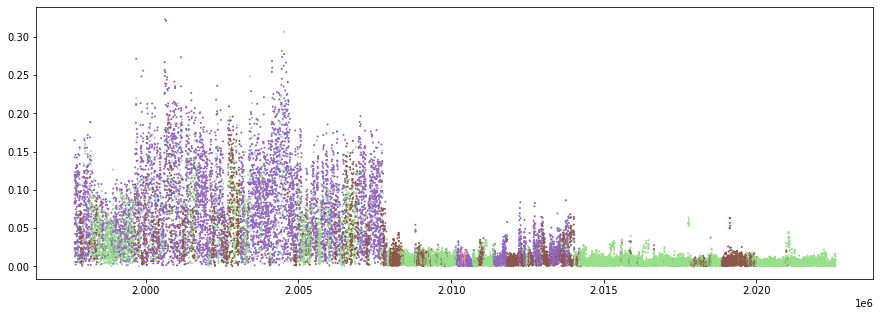

In [112]:
fig, axes = plt.subplots(1,1,figsize=(15,5))
axes.scatter(df_test1.index, df_test1['speed_DTP2'], s=1, c=test_labels_c)

## pick frames

In [138]:
test_file_id

'20180724_180559_1_15m0s_None_None_None_INVERTED'

In [145]:
path_to_video = (df[df['filename'] == test_file_id])['path_to_video'].unique()[0]

In [149]:
path_to_video

'/media/athira/Amphioxus1/20180724/Exp_20180724_180559_1_15m0s_None_None_None/20180724_180559_1_15m0s_None_None_None_INVERTED.avi'

In [147]:
test_dict_clusters = {f'cluster_{i}':np.sum(test_lables==i) for i in list(np.unique(test_lables))}

In [154]:
test_dict_clusters

{'cluster_-1': 73,
 'cluster_0': 654,
 'cluster_2': 4,
 'cluster_3': 19,
 'cluster_4': 11454,
 'cluster_6': 103,
 'cluster_7': 7506,
 'cluster_9': 5113}

In [157]:
(df[df['filename'] == test_file_id])['dlc_result_file'].unique()[0]

'../../data/dlc_results/20180724_180559_1_15m0s_None_None_None_INVERTEDDLC_resnet50_AmphioxusJun19shuffle1_110000_el.h5'

# HMM 

In [114]:
from hmmlearn import hmm

In [115]:
model_hmm = hmm.GaussianHMM(n_components=5)

In [116]:
model_hmm.fit(cluster_in_test)

GaussianHMM(n_components=5)

In [117]:
state_seq = model_hmm.predict(cluster_in_test)

In [118]:
frames = df[df['filename'] == test_file_id]['frame']

In [119]:
state_seq

array([2, 2, 2, ..., 4, 4, 4])

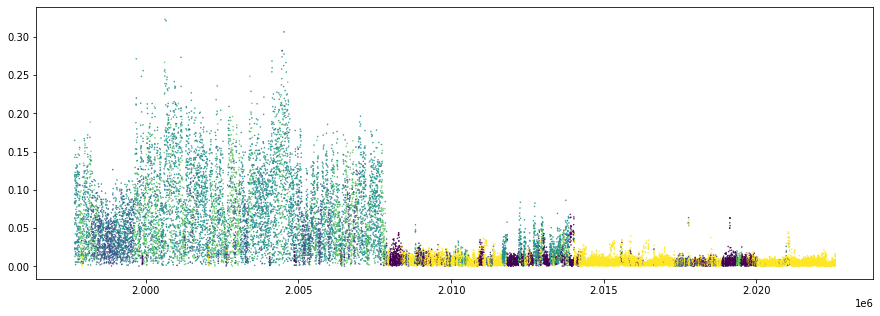

In [120]:
fig, axes = plt.subplots(1,1,figsize=(15,5))
axes.scatter(df_test1.index, df_test1['speed_DTP2'], s=0.25, c=state_seq)

# Check trajectories

In [121]:
import os
import sys
sys.path.append('../utils/')

In [122]:
from dlc_helper import DLC_tracking

In [123]:
# grouped_drugs = (df[df['drugs'] != df['drug']][['filename', 'drug', 'drugs']]).groupby('filename')

In [124]:
# for name, group in grouped_drugs:
#     print(name,group['drug'].unique(), group['drugs'].unique())

In [125]:
test_file_dlc = df[df['filename'] == test_file_id]['dlc_result_file'].unique()[0]

In [126]:
test_file_dlc

'../../data/dlc_results/20180724_180559_1_15m0s_None_None_None_INVERTEDDLC_resnet50_AmphioxusJun19shuffle1_110000_el.h5'

In [127]:
test_file_folder, test_file_path = os.path.split(test_file_dlc)

In [128]:
dlc_obj = DLC_tracking(test_file_path, test_file_folder)


In [129]:
len(dlc_obj.df_data.index)

26961

In [130]:
df_results_test = pd.DataFrame({'frames':frames, 'cluster_hmm': state_seq, 'hdbscan':test_lables})

In [131]:
df_results_test = df_results_test.set_index(frames)

In [132]:
df_results_test = df_results_test.reindex(dlc_obj.df_data.index)

In [133]:
df_results_test

,frames,cluster_hmm,hdbscan
0,0.0,2.0,7.0
1,1.0,2.0,7.0
2,2.0,2.0,7.0
3,3.0,2.0,7.0
4,4.0,2.0,7.0
...,...,...,...
26956,26956.0,4.0,4.0
26957,26957.0,4.0,4.0
26958,26958.0,4.0,4.0
26959,26959.0,4.0,4.0


In [160]:
df_results_test[df_results_test['hdbscan'] == 6]

,frames,cluster_hmm,hdbscan
412,412.0,2.0,6.0
13160,13160.0,2.0,6.0
14603,14603.0,2.0,6.0
14606,14606.0,2.0,6.0
14608,14608.0,2.0,6.0
...,...,...,...
14870,14870.0,2.0,6.0
14879,14879.0,2.0,6.0
14881,14881.0,2.0,6.0
14885,14885.0,2.0,6.0


<AxesSubplot:xlabel='NT_x', ylabel='NT_y'>

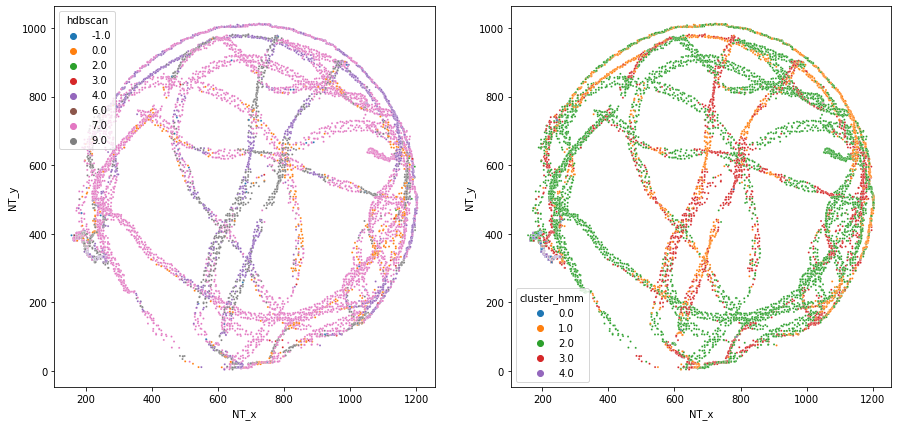

In [134]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(data = dlc_obj.df_data, x='NT_x',y='NT_y', s=4, hue=df_results_test['hdbscan'],
                ax=axes[0], palette='tab10')
sns.scatterplot(data = dlc_obj.df_data, x='NT_x',y='NT_y', s=4, hue=df_results_test['cluster_hmm'],
                ax=axes[1], palette='tab10')

In [135]:
c_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

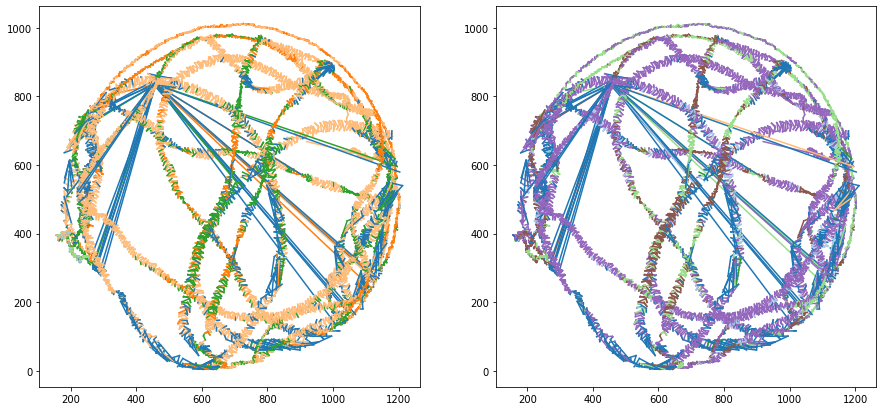

In [136]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
x = dlc_obj.df_data['NT_x']
y = dlc_obj.df_data['NT_y']
df_results_test['cluster_hmm'].fillna(-1, inplace=True)
df_results_test['hdbscan'].fillna(-1, inplace=True)
hue_hmm = [c_pal[int(c+1)] for c in df_results_test['cluster_hmm']]
hue_hdb = [c_pal[int(c+1)] for c in df_results_test['hdbscan']]

for i in range(len(dlc_obj.df_data.index) -1):
    axes[0].plot(x[i:i+2], y[i:i+2], c=hue_hmm[i])   
    axes[1].plot(x[i:i+2], y[i:i+2], c=hue_hdb[i])

In [ ]:
/media/athira/Amphioxus1/20180722/Exp_20180722_115946_1_15m0s_None_None_None/20180722_115946_1_15m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_121453_1_5m0s_None_None_None/20180722_121453_1_5m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_121958_1_5m0s_None_None_None/20180722_121958_1_5m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_122503_1_5m0s_None_None_None/20180722_122503_1_5m0s_None_None_None_INVERTED.avi

In [ ]:
/media/athira/Amphioxus1/20180722/Exp_20180722_123055_1_15m0s_None_None_None/20180722_123055_1_15m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_124638_1_5m0s_None_None_None/20180722_124638_1_5m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_125143_1_5m0s_None_None_None/20180722_125143_1_5m0s_None_None_None_INVERTED.avi
/media/athira/Amphioxus1/20180722/Exp_20180722_125648_1_5m0s_None_None_None/20180722_125648_1_5m0s_None_None_None_INVERTED.avi